## REGRESIÓN LOGISTICA PRUEBA 1
PROYECTO DE GESTIÓN DE REDES - Gestión de redes IoT

In [2]:
import pandas as pd
import os

# Definir rutas de las carpetas
test_path = "Test_Prueba1"
train_path = "Train_Prueba1"

# Cargar archivos de prueba
test_files = {
    "ARP_Spoofing": "ARP_Spoofing_test.csv",
    "Benign": "Benign_test.csv",
    "DDoS": "DDoS_test.csv",
    "DoS": "DoS_test.csv",
    "MQTT": "MQTT_test.csv",
    "Recon": "Recon_test.csv"
}

test_data = {name: pd.read_csv(os.path.join(test_path, file)) for name, file in test_files.items()}

# Cargar archivos de entrenamiento
train_files = {
    "Benign": "Benign_train.csv",
    "DDoS": "DDoS_train.csv",
    "DoS": "DoS_train.csv",
    "MQTT": "MQTT_train.csv",
    "Recon": "Recon_train.csv",
    "ARP_Spoofing": "Spoofing_train.csv"
}

train_data = {name: pd.read_csv(os.path.join(train_path, file)) for name, file in train_files.items()}

In [3]:
# Acceder a un DataFrame 
df_analizar = test_data["Benign"]
df_analizar.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Label
0,319606.0,6.0,64.0,1.366686,1.366686,0.0,0.0,0.0,0.0,0.5,...,16.262070,77.3,1.694702e+08,13.5,12.663093,23.013372,265.175418,1.0,244.6,Benign
1,33109.3,6.0,64.0,1.576552,1.576552,0.0,0.0,0.0,0.0,0.5,...,14.232702,81.3,1.513958e-04,5.5,12.476242,20.128080,236.705162,0.9,38.5,Benign
2,22840.1,6.0,64.0,0.303351,0.303351,0.0,0.0,0.0,0.0,1.0,...,8.935370,88.4,8.418560e-05,5.5,13.286643,12.636522,105.067650,0.9,38.5,Benign
3,240123.2,6.0,64.0,2.033665,2.033665,0.0,0.0,0.0,0.0,0.5,...,17.569529,80.5,1.694705e+08,13.5,12.793984,24.861021,309.436651,1.0,244.6,Benign
4,236089.2,6.0,69.9,0.911873,0.911873,0.0,0.0,0.0,0.0,0.5,...,15.417590,76.3,1.694698e+08,13.5,12.598301,21.815770,238.560331,1.0,244.6,Benign


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Unir los DataFrames de entrenamiento y prueba
train_df = pd.concat(train_data.values(), ignore_index=True)
test_df = pd.concat(test_data.values(), ignore_index=True)

# Separar características y etiquetas
X_train = train_df.drop(columns=['Attack_Label'])
y_train = train_df['Attack_Label']
X_test = test_df.drop(columns=['Attack_Label'])
y_test = test_df['Attack_Label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de regresión logística
model = LogisticRegression(max_iter=10000, class_weight='balanced', penalty= 'l2', C= 100, solver= 'liblinear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)  # NO necesitas np.argmax()

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Promedio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.7253
Precision: 0.7288
Recall: 0.7253
F1-Score: 0.7220


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Controla la regularización
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

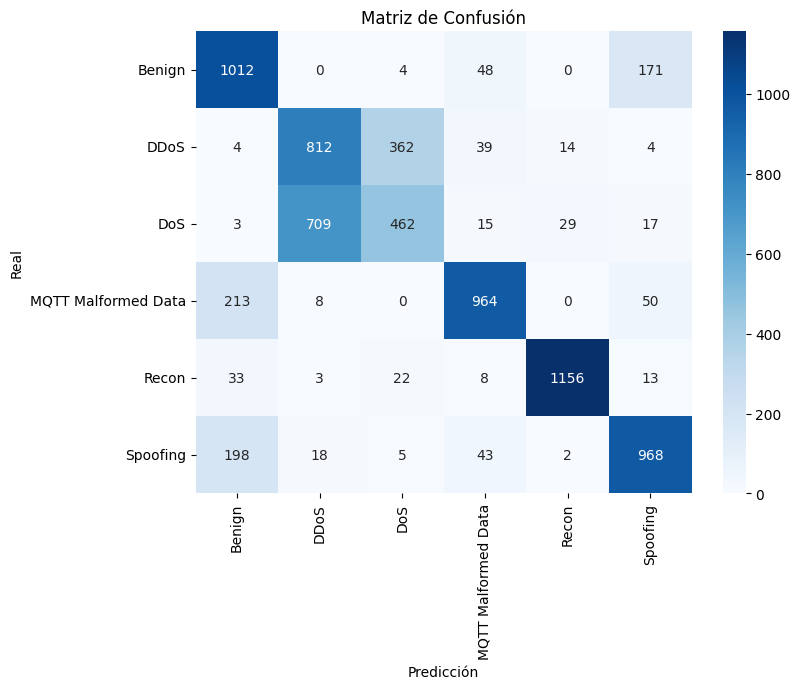

                     precision    recall  f1-score   support

             Benign       0.69      0.82      0.75      1235
               DDoS       0.52      0.66      0.58      1235
                DoS       0.54      0.37      0.44      1235
MQTT Malformed Data       0.86      0.78      0.82      1235
              Recon       0.96      0.94      0.95      1235
           Spoofing       0.79      0.78      0.79      1234

           accuracy                           0.73      7409
          macro avg       0.73      0.73      0.72      7409
       weighted avg       0.73      0.73      0.72      7409



In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))